# Predictive Analytics

## Import Semua Packages/Library yang Digunakan

In [4]:
!pip install kaggle

In [5]:
import pandas as pd
import os
import numpy as np
import shutil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Data Loading

In [6]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gerhardien","key":"3d7f20b52f08ca709fcb53af0a9fe0dd"}'}

In [7]:
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [8]:
!kaggle datasets download -d taweilo/loan-approval-classification-data


Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
License(s): apache-2.0
loan-approval-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip /content/loan-approval-classification-data.zip -d /content/data

Archive:  /content/loan-approval-classification-data.zip
replace /content/data/loan_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/loan_data.csv  


### Data Preprocessing

In [10]:
df = pd.read_csv('/content/data/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [12]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [13]:
df.shape

(45000, 14)

In [14]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [15]:
print(df.dtypes)


person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [16]:
df = df[df['person_age'] <= 100]
df = df[df['person_emp_exp'] <= 60]
df = df[df['person_income'] <= 500000]

df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44889.000000,44889.000000,44889.000000,44889.000000,44889.000000,44889.000000,44889.000000,44889.000000,44889.000000
mean,27.722983,78129.630199,5.369266,9573.043329,11.006248,0.140010,5.851456,632.553721,0.222460
std,5.866631,47503.494168,5.881446,6304.449382,2.979769,0.087113,3.858009,50.379325,0.415903
min,20.000000,8000.000000,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,47135.000000,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,67014.000000,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,95264.000000,8.000000,12200.000000,13.000000,0.190000,8.000000,670.000000,0.000000
max,78.000000,498907.000000,58.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


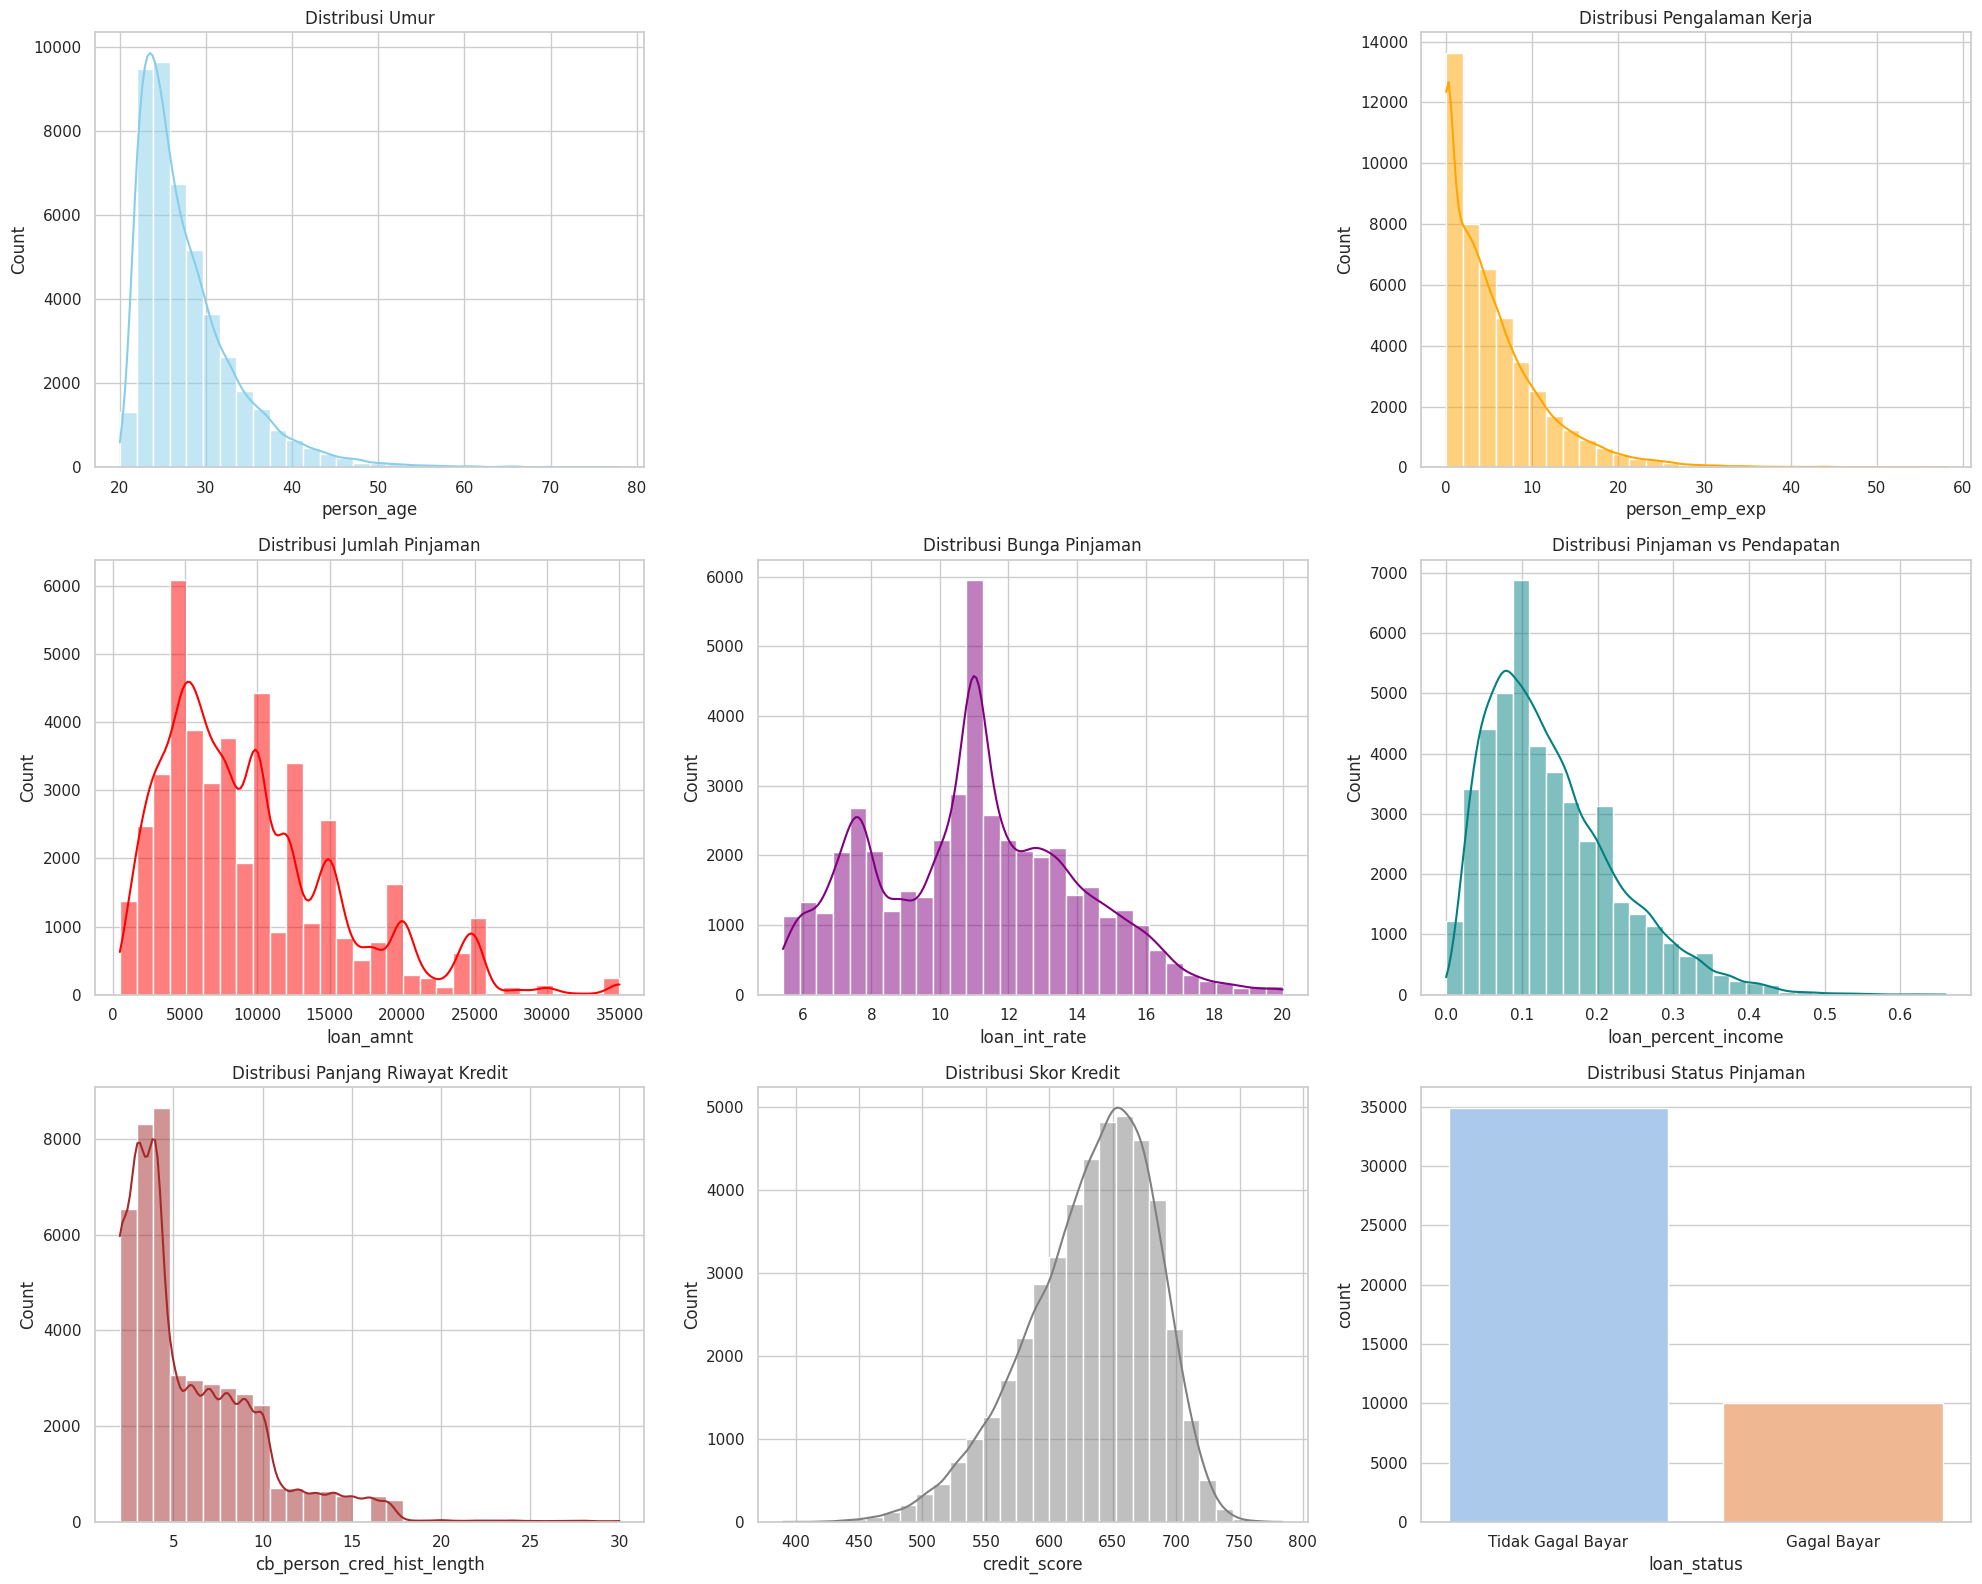

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 1)
sns.histplot(df['person_age'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Umur")

plt.subplot(3, 3, 3)
sns.histplot(df['person_emp_exp'], bins=30, kde=True, color='orange')
plt.title("Distribusi Pengalaman Kerja")

plt.subplot(3, 3, 4)
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='red')
plt.title("Distribusi Jumlah Pinjaman")

plt.subplot(3, 3, 5)
sns.histplot(df['loan_int_rate'], bins=30, kde=True, color='purple')
plt.title("Distribusi Bunga Pinjaman")

plt.subplot(3, 3, 6)
sns.histplot(df['loan_percent_income'], bins=30, kde=True, color='teal')
plt.title("Distribusi Pinjaman vs Pendapatan")

plt.subplot(3, 3, 7)
sns.histplot(df['cb_person_cred_hist_length'], bins=30, kde=True, color='brown')
plt.title("Distribusi Panjang Riwayat Kredit")

plt.subplot(3, 3, 8)
sns.histplot(df['credit_score'], bins=30, kde=True, color='gray')
plt.title("Distribusi Skor Kredit")

plt.subplot(3, 3, 9)
sns.countplot(x='loan_status', data=df, palette='pastel')
plt.title("Distribusi Status Pinjaman")
plt.xticks([0, 1], ['Tidak Gagal Bayar', 'Gagal Bayar'])

plt.tight_layout()
plt.show()


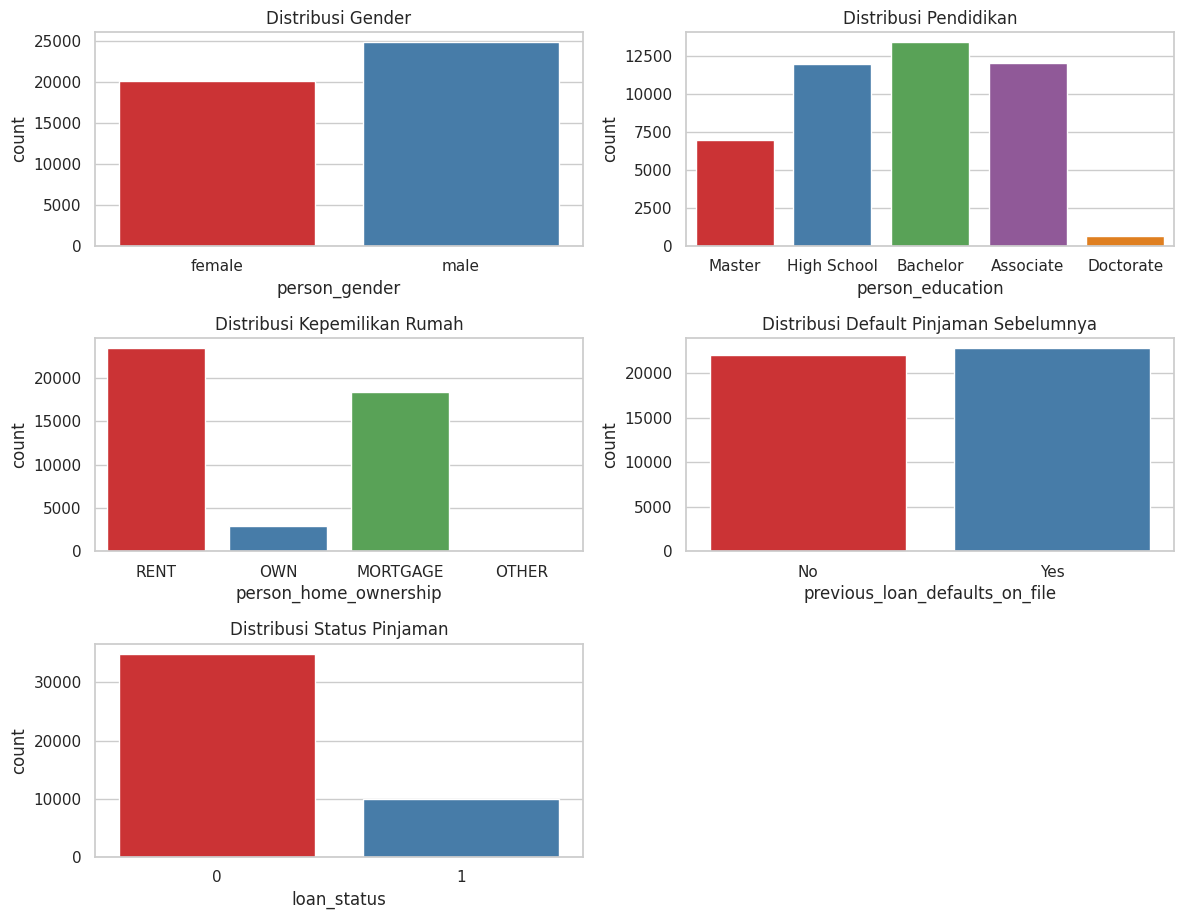

In [18]:
plt.figure(figsize=(12, 18))

plt.subplot(6, 2, 1)
sns.countplot(x='person_gender', data=df, palette='Set1')
plt.title('Distribusi Gender')

plt.subplot(6, 2, 2)
sns.countplot(x='person_education', data=df, palette='Set1')
plt.title('Distribusi Pendidikan')

plt.subplot(6, 2, 3)
sns.countplot(x='person_home_ownership', data=df, palette='Set1')
plt.title('Distribusi Kepemilikan Rumah')

plt.subplot(6, 2, 4)
sns.countplot(x='previous_loan_defaults_on_file', data=df, palette='Set1')
plt.title('Distribusi Default Pinjaman Sebelumnya')

plt.subplot(6, 2, 5)
sns.countplot(x='loan_status', data=df, palette='Set1')
plt.title('Distribusi Status Pinjaman')

plt.tight_layout()

plt.show()


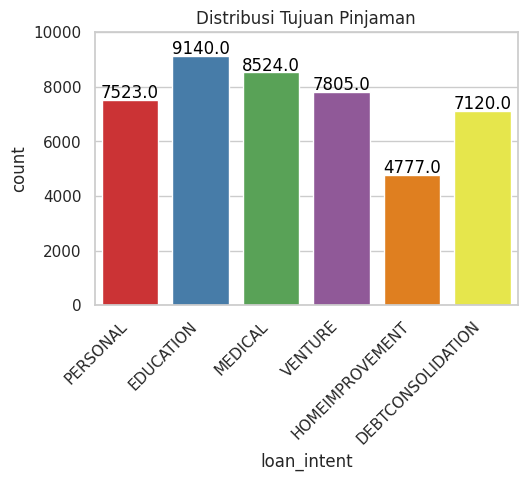

loan_intent
EDUCATION            9140
MEDICAL              8524
VENTURE              7805
PERSONAL             7523
DEBTCONSOLIDATION    7120
HOMEIMPROVEMENT      4777
Name: count, dtype: int64


In [19]:
plt.figure(figsize=(12, 8))
plt.subplot(6, 2, 4)
ax = sns.countplot(x='loan_intent', data=df, palette='Set1')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, 10000)

plt.title('Distribusi Tujuan Pinjaman')
plt.subplots_adjust(top=2.5)
plt.show()

print(df['loan_intent'].value_counts())


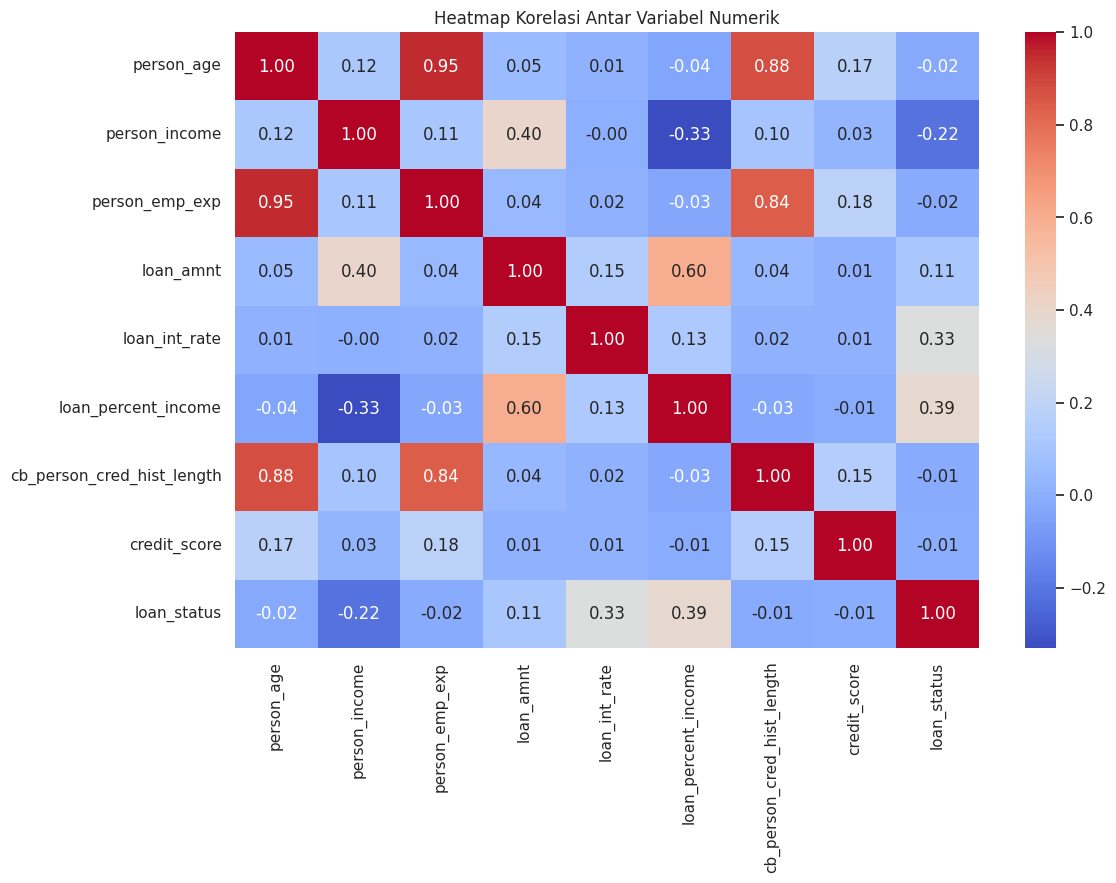

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.119431,0.951609,0.050859,0.012700,-0.037118,0.878261,0.173377,-0.019162
person_income,0.119431,1.000000,0.107585,0.397481,-0.001065,-0.330275,0.099715,0.026067,-0.215683
person_emp_exp,0.951609,0.107585,1.000000,0.044422,0.016039,-0.033696,0.839448,0.181332,-0.018183
loan_amnt,0.050859,0.397481,0.044422,1.000000,0.145945,0.597750,0.041607,0.008786,0.107594
loan_int_rate,0.012700,-0.001065,0.016039,0.145945,1.000000,0.125733,0.017860,0.011442,0.332383
loan_percent_income,-0.037118,-0.330275,-0.033696,0.597750,0.125733,1.000000,-0.026555,-0.010429,0.385338
cb_person_cred_hist_length,0.878261,0.099715,0.839448,0.041607,0.017860,-0.026555,1.000000,0.153711,-0.013629
credit_score,0.173377,0.026067,0.181332,0.008786,0.011442,-0.010429,0.153711,1.000000,-0.007321
loan_status,-0.019162,-0.215683,-0.018183,0.107594,0.332383,0.385338,-0.013629,-0.007321,1.000000


In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

df.corr(numeric_only=True)



In [21]:
print(df['loan_status'].value_counts())

loan_status
0    34903
1     9986
Name: count, dtype: int64


In [22]:
df_resampled = df.copy()

In [23]:
label_encoder = LabelEncoder()

df_resampled['person_gender'] = label_encoder.fit_transform(df_resampled['person_gender'])
df_resampled['previous_loan_defaults_on_file'] = label_encoder.fit_transform(df_resampled['previous_loan_defaults_on_file'])

df_resampled['person_home_ownership'] = label_encoder.fit_transform(df_resampled['person_home_ownership'])

df_resampled = pd.get_dummies(df_resampled, columns=['person_education', 'loan_intent'], drop_first=True)

df_resampled


,person_age,person_gender,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,loan_status,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,3,35000.0,16.02,0.49,3.0,561,...,1,False,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,2,1000.0,11.14,0.08,2.0,504,...,0,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,0,5500.0,12.87,0.44,3.0,635,...,1,False,False,True,False,False,False,True,False,False
3,23.0,0,79753.0,0,3,35000.0,15.23,0.44,2.0,675,...,1,True,False,False,False,False,False,True,False,False
4,24.0,1,66135.0,1,3,35000.0,14.27,0.53,4.0,586,...,1,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,3,15000.0,15.66,0.31,3.0,645,...,1,False,False,False,False,False,False,True,False,False
44996,37.0,0,65800.0,17,3,9000.0,14.07,0.14,11.0,621,...,1,False,False,False,False,False,True,False,False,False
44997,33.0,1,56942.0,7,3,2771.0,10.02,0.05,10.0,668,...,1,False,False,False,False,False,False,False,False,False
44998,29.0,1,33164.0,4,3,12000.0,13.23,0.36,6.0,604,...,1,True,False,False,False,True,False,False,False,False


In [24]:

X = df_resampled.drop('loan_status', axis=1)
y = df_resampled['loan_status']

categorical_features = [2, 5]

smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy={1: 15000}, random_state=42)

X_oversampled, y_oversampled = smote_nc.fit_resample(X, y)

undersampler = RandomUnderSampler(sampling_strategy={0: 15000}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_oversampled, y_oversampled)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['loan_status'] = y_resampled

print(df_resampled['loan_status'].value_counts())

df_resampled


loan_status
0    15000
1    15000
Name: count, dtype: int64


,person_age,person_gender,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
41942,25.000000,0,63626.0,3,2,8496.0,10.670000,0.130000,3.000000,661,...,True,False,False,False,False,False,False,False,True,0
20769,32.000000,0,51647.0,10,3,5000.0,10.080000,0.100000,9.000000,627,...,False,False,True,False,False,False,False,False,False,0
33553,23.000000,0,138583.0,0,0,13245.0,9.980000,0.100000,4.000000,672,...,False,False,False,False,True,False,False,False,False,0
10069,26.000000,0,79256.0,1,2,7000.0,13.920000,0.090000,3.000000,659,...,False,False,True,False,False,False,True,False,False,0
14479,22.000000,1,43599.0,0,3,2000.0,8.380000,0.050000,2.000000,638,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49898,31.000000,0,68684.0,7,3,5000.0,12.944188,0.150183,8.000000,680,...,True,False,False,False,True,False,False,False,False,1
49899,31.339615,0,116216.0,12,3,12000.0,17.186045,0.203585,8.000000,622,...,True,False,False,False,False,False,True,False,True,1
49900,24.043867,0,43684.0,4,3,13000.0,11.074655,0.264297,2.087734,650,...,False,False,False,False,True,False,False,False,False,1
49901,24.000000,0,13987.0,2,3,5000.0,7.321804,0.338879,2.000000,638,...,False,False,True,False,False,False,True,False,True,1


In [31]:
X = df_resampled.drop(columns=['loan_status'])
y = df_resampled['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modelling

In [43]:


logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
print("=== Logistic Regression (Default) ===")
print(classification_report(y_test, y_pred_logreg))


=== Logistic Regression (Default) ===
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3048
           1       0.84      0.93      0.88      2952

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("=== Random Forest (Default) ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest (Default) ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3048
           1       0.89      0.94      0.91      2952

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



In [45]:
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("=== XGBoost (Default) ===")
print(classification_report(y_test, y_pred_xgb))


=== XGBoost (Default) ===
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3048
           1       0.91      0.93      0.92      2952

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



## Improvement model dengan hyperparameter tuning

In [37]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000]
}

grid_logreg = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_logreg,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_logreg.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_logreg.best_params_)
print("Best score:", grid_logreg.best_score_)


Best parameters (Logistic Regression): {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8817571631623926


In [38]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Best parameters (Random Forest):", grid_rf.best_params_)
print("Best score:", grid_rf.best_score_)

Best parameters (Random Forest): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9135269609770985


In [39]:
param_grid_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid_xgb,
    cv=3,
    scoring='f1',
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)

print("Best parameters (XGBoost):", grid_xgb.best_params_)
print("Best score:", grid_xgb.best_score_)


Best parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 1}
Best score: 0.9221770922487892


## Evaluasi dan Visualisasi

In [40]:
best_logreg = grid_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)

print("=== Logistic Regression (Tuned) ===")
print(classification_report(y_test, y_pred_logreg))

=== Logistic Regression (Tuned) ===
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      3048
           1       0.84      0.93      0.88      2952

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



In [41]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("=== Random Forest (Tuned) ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest (Tuned) ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3048
           1       0.89      0.94      0.92      2952

    accuracy                           0.91      6000
   macro avg       0.92      0.91      0.91      6000
weighted avg       0.92      0.91      0.91      6000



In [42]:
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("=== XGBoost (Tuned) ===")
print(classification_report(y_test, y_pred_xgb))


=== XGBoost (Tuned) ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3048
           1       0.91      0.94      0.93      2952

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

